In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
priv_sect = pd.read_excel("C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/BRICS_World_Bank_Indicators/BRICS_Private_Sector_Data.xlsx")

In [5]:
top10depart_RF_1995_2018 = pd.read_csv("C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/top10depart_RF_1995_2018.csv") 

In [6]:
top10depart_RF_1995_2018 = top10depart_RF_1995_2018.set_index('Unnamed: 0')

In [7]:
top10depart_RF_1995_2018.index.names = [None]

In [8]:
pr_s = priv_sect.copy()

In [9]:
pr_s = pr_s.rename(columns={"Country Name": "Country_Name","Country Code": "Country_Code", "Series Name": "Series_Name", "Series Code": "Series_Code"})

In [10]:
pr_s.columns = pr_s.columns.str.replace(' \[YR\d+\]', '', regex=True)

In [11]:
pr_s_RF = pr_s.loc[pr_s["Country_Name"] == "Russian Federation", :]

In [12]:
pr_s_RF_1995_2018 = pr_s_RF.drop(pr_s_RF.loc[:,'1970':'1994'].columns, axis=1)

In [13]:
pr_s_RF_1995_2018=pr_s_RF_1995_2018.drop(['Country_Code','Series_Code'], axis=1) 

In [14]:
result = pd.concat([top10depart_RF_1995_2018, pr_s_RF_1995_2018], axis=0)

In [15]:
result_melt = result.melt(id_vars=['Country_Name','Series_Name'], value_vars=['1995','1996','1997','1998','1999','2000','2001'
                                                                              ,'2002','2003','2004','2005','2006','2007','2008'
                                                                              ,'2009','2010','2011','2012','2013','2014','2015'
                                                                              ,'2016','2017','2018','2019','2020'], ignore_index=False) #or transpose

In [16]:
result_transpose = result.T

In [17]:
df=result_transpose.copy()

In [18]:
df.columns = df.columns.astype(str)

In [19]:
df = df.rename(columns={'4': 'dep4'})

In [20]:
df = df.drop(['Country_Name','Series_Name','2020'])

In [21]:
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

In [22]:
df.corrwith(df["dep4"],axis=0).sort_values()

504    -0.952429
583    -0.905238
553    -0.904776
547    -0.858104
614    -0.828852
669    -0.812136
603    -0.811906
609    -0.811906
581    -0.808040
539    -0.805779
536    -0.785414
638    -0.784170
641    -0.781438
644    -0.777195
549    -0.776936
637    -0.772408
534    -0.766992
640    -0.760326
647    -0.752816
562    -0.745172
643    -0.739557
617    -0.727283
533    -0.727283
670    -0.727165
646    -0.719332
543    -0.699382
615    -0.698929
535    -0.625451
506    -0.615138
538    -0.605208
653    -0.580380
540    -0.568278
610    -0.555676
556    -0.523625
642    -0.515243
588    -0.496520
631    -0.470741
580    -0.448848
514    -0.437885
613    -0.434447
619    -0.416424
620    -0.416005
612    -0.408919
664    -0.407003
505    -0.406831
635    -0.405247
634    -0.405247
628    -0.399869
650    -0.393871
657    -0.390028
656    -0.390028
655    -0.390028
633    -0.387538
654    -0.386121
604    -0.384152
630    -0.379630
520    -0.369350
521    -0.369350
522    -0.3693

In [23]:
df_ind = df.reset_index()

In [24]:
result_transpose[[561,585,531,584,563,552,517,516,551,597,598,550,558,557,559,564,530]].iloc[1] # > 0.9

561          International tourism, number of departures
585    Merchandise exports by the reporting economy (...
531                      Export value index (2000 = 100)
584                    Merchandise exports (current US$)
563        International tourism, receipts (current US$)
552                     Import volume index (2000 = 100)
517             Commercial service imports (current US$)
516             Commercial service exports (current US$)
551                      Import value index (2000 = 100)
597                    Merchandise imports (current US$)
598    Merchandise imports by the reporting economy (...
550                 Import unit value index (2000 = 100)
558    International tourism, expenditures for passen...
557    International tourism, expenditures (current US$)
559    International tourism, expenditures for travel...
564    International tourism, receipts for passenger ...
530                 Export unit value index (2000 = 100)
Name: Series_Name, dtype: objec

In [25]:
melt_to_plot1 = result_melt[result_melt.index.isin([531,584,563,552,517,516,551,597,598,550,558,559,564,530])]

In [26]:
melt_to_plot2 = result_melt[result_melt.index.isin([517,516])]

In [27]:
melt_to_plot3 = result_melt[result_melt.index.isin([531,551])]

In [28]:
melt_ind1 = melt_to_plot1.reset_index()

In [29]:
melt_ind2 = melt_to_plot2.reset_index()

In [30]:
melt_ind3 = melt_to_plot3.reset_index()

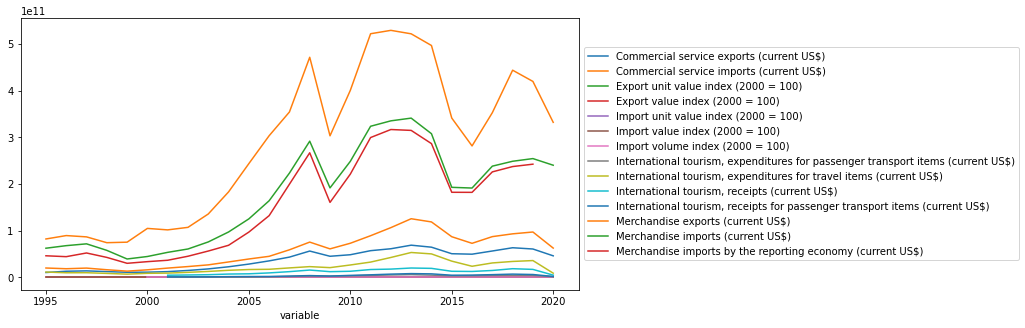

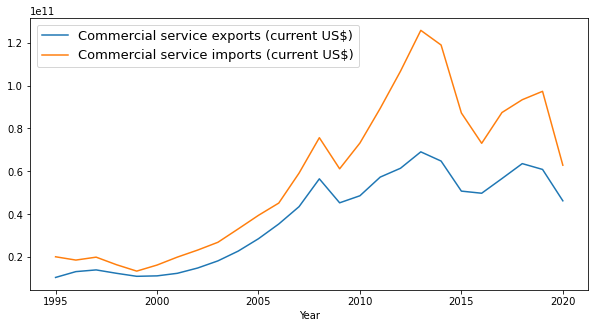

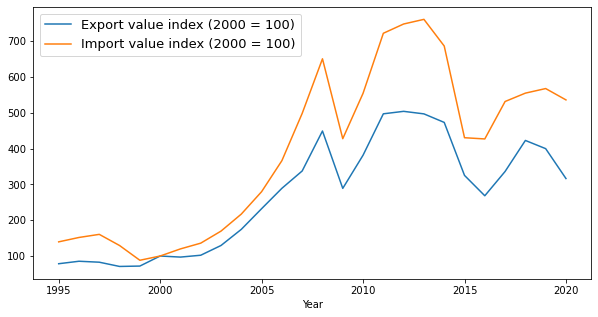

In [32]:
e_ch1 = melt_ind1.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch1.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
e_ch2 = melt_ind2.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch2.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(fontsize=13)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/pr_s_RF_1.png',dpi=200
           ,bbox_inches='tight') 
e_ch3 = melt_ind3.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch3.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(fontsize=13)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/pr_s_RF_2.png',dpi=200
           ,bbox_inches='tight') 

In [33]:
result_transpose[[504,583,553,547,614,669,603,609,581,539,536,638,641]].iloc[1]

504    Agricultural raw materials exports (% of merch...
583    Medium and high-tech exports (% manufactured e...
553    Informal payments to public officials (% of fi...
547              Food imports (% of merchandise imports)
614    Ores and metals exports (% of merchandise expo...
669    Travel services (% of commercial service exports)
603    Merchandise imports from low- and middle-incom...
609    Merchandise imports from low- and middle-incom...
581      Manufactures exports (% of merchandise exports)
539    Firms that do not report all sales for tax pur...
536    Firms experiencing losses due to theft and van...
638    Tariff rate, applied, simple mean, manufacture...
641    Tariff rate, applied, weighted mean, manufactu...
Name: Series_Name, dtype: object

In [35]:
melt_neg1 = result_melt[result_melt.index.isin([669])] 

In [36]:
melt_plot1 = melt_neg1.reset_index()

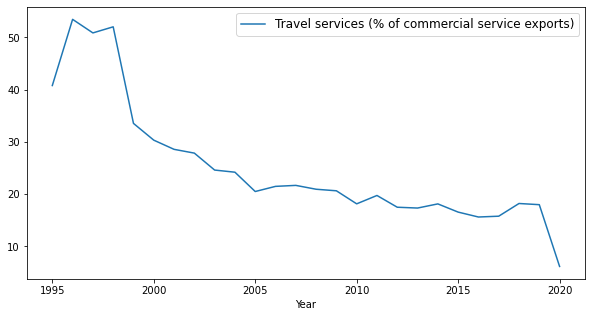

In [37]:
h_neg1 = melt_neg1.pivot(index = 'variable', columns='Series_Name', values='value')
h_neg1.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.axvline(x=14, color='grey',ls='--') #2015=20, 2010=15
#ax.axvline(x=19, color='grey',ls='--')
ax.legend(fontsize=12)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/pr_s_neg_RF_1.png',dpi=200
           ,bbox_inches='tight')